# Testing CoarseNet with Unweighted Undirected Graphs

This notebook tests the simplified contraction logic for unweighted undirected graphs.

In [1]:
import sys
from pathlib import Path

# Add src to path
sys.path.insert(0, str(Path.cwd().parent / "src"))

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from graph_reduction.core.coarseners import CoarseNetCoarsener, coarsenet


## Test 1: Simple Unweighted Undirected Graph

Let's create a simple test graph to verify the contraction logic.

Original Graph:
Nodes: [1, 2, 3, 4]
Edges: [(1, 2), (1, 4), (1, 3), (2, 3), (2, 4), (3, 4)]
Number of nodes: 4
Number of edges: 6
Is directed: False
Is weighted: False


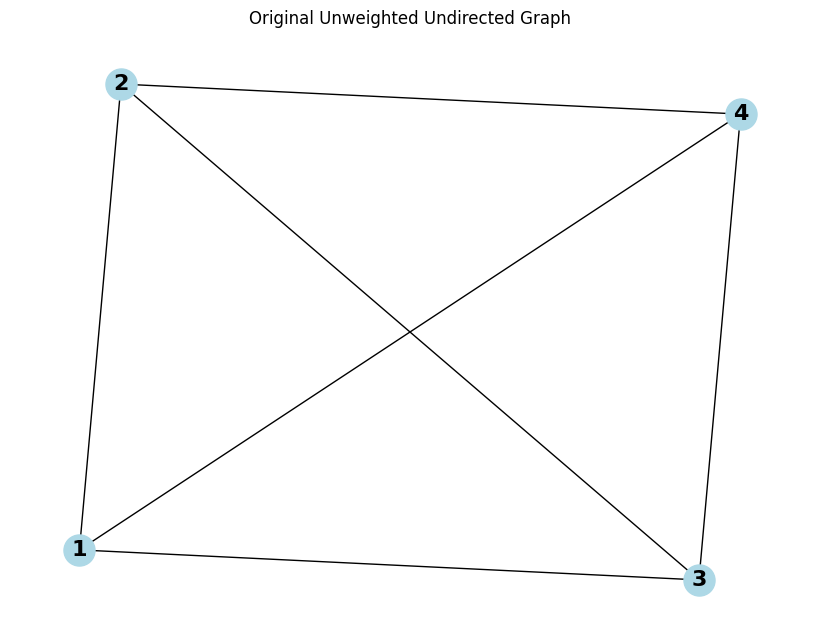

In [2]:
# Create a simple unweighted undirected graph
G_test = nx.Graph()

# Add edges to create a small network
edges = [(1, 2), (2, 3), (3, 4), (4, 1), (1, 3), (2, 4)]
G_test.add_edges_from(edges)

print("Original Graph:")
print(f"Nodes: {list(G_test.nodes())}")
print(f"Edges: {list(G_test.edges())}")
print(f"Number of nodes: {G_test.number_of_nodes()}")
print(f"Number of edges: {G_test.number_of_edges()}")
print(f"Is directed: {G_test.is_directed()}")
print(f"Is weighted: {nx.is_weighted(G_test)}")

# Visualize the original graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G_test)
nx.draw(G_test, pos, with_labels=True, node_color='lightblue', 
        node_size=500, font_size=16, font_weight='bold')
plt.title("Original Unweighted Undirected Graph")
plt.show()


## Test 2: Manual Contraction Test

Let's test the contraction logic manually by contracting nodes 1 and 2.

Testing manual contraction of nodes 1 and 2...

After contraction:
Nodes: [3, 4, (1, 2)]
Edges: [(3, 4), (3, (1, 2)), (4, (1, 2))]
Number of nodes: 3
Number of edges: 3


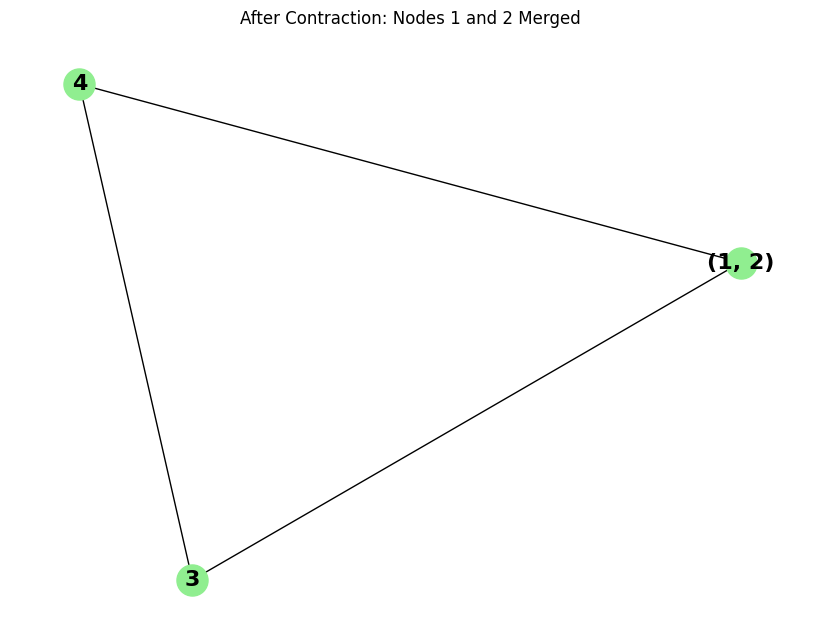

In [3]:
# Test manual contraction
coarsener = CoarseNetCoarsener()

print("Testing manual contraction of nodes 1 and 2...")
G_contracted = coarsener._contract_unweighted_undirected(G_test.copy(), 1, 2)

print("\nAfter contraction:")
print(f"Nodes: {list(G_contracted.nodes())}")
print(f"Edges: {list(G_contracted.edges())}")
print(f"Number of nodes: {G_contracted.number_of_nodes()}")
print(f"Number of edges: {G_contracted.number_of_edges()}")

# Visualize the contracted graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G_contracted)
nx.draw(G_contracted, pos, with_labels=True, node_color='lightgreen', 
        node_size=500, font_size=16, font_weight='bold')
plt.title("After Contraction: Nodes 1 and 2 Merged")
plt.show()


## Test 3: Full CoarseNet Algorithm Test

Now let's test the full algorithm with a 50% reduction.

Testing full CoarseNet algorithm with 50% reduction...
Graph type: Unweighted Undirected
Graph has weight attribute: False
Sample edge data: (1, 2, {})
Initial eigenvalue (Lambda): 3.0000
Fusion tasks ordered by score (best to worst):
  Score(3,4) = -0.0000
  Score(1,2) = -0.0000
  Score(1,4) = -0.0000
  Score(1,3) = -0.0000
  Score(2,4) = 0.0000
  Score(2,3) = 0.0000
-------------------------
Merging 3 and 4 (based on original score of (3, 4))
  --> New largest eigenvalue: 2.0000
Merging 1 and 2 (based on original score of (1, 2))
  --> New largest eigenvalue: 1.0000

Final reduced graph:
Nodes: [(3, 4), (1, 2)]
Edges: [((3, 4), (1, 2))]
Number of nodes: 2
Number of edges: 1


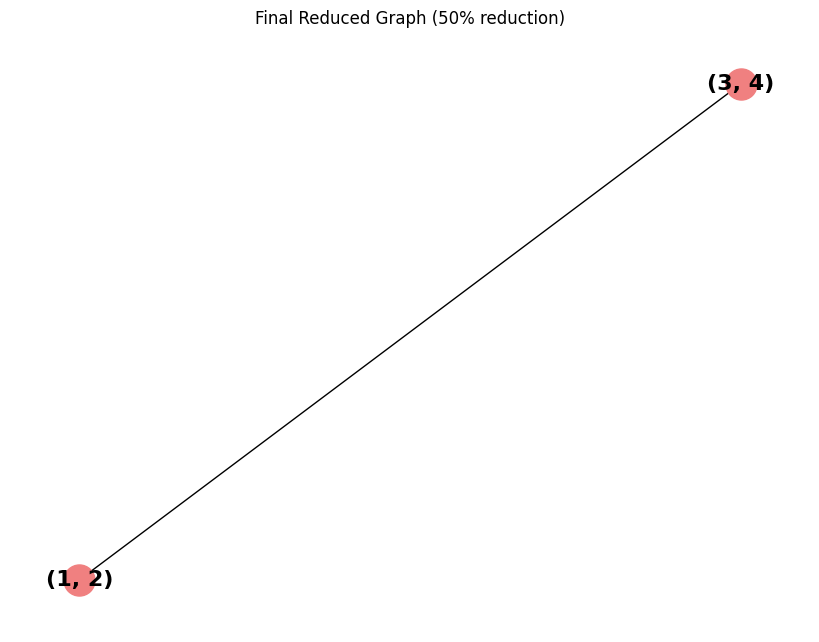

In [4]:
# Test full algorithm
print("Testing full CoarseNet algorithm with 50% reduction...")
G_reduced = coarsenet(G_test, alpha=0.5, verbose=True)

print("\nFinal reduced graph:")
print(f"Nodes: {list(G_reduced.nodes())}")
print(f"Edges: {list(G_reduced.edges())}")
print(f"Number of nodes: {G_reduced.number_of_nodes()}")
print(f"Number of edges: {G_reduced.number_of_edges()}")

# Visualize the final result
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G_reduced)
nx.draw(G_reduced, pos, with_labels=True, node_color='lightcoral', 
        node_size=500, font_size=16, font_weight='bold')
plt.title("Final Reduced Graph (50% reduction)")
plt.show()


## Test 4: Verify Edge Preservation

Let's verify that the contraction correctly preserves connectivity.

In [5]:
def analyze_connectivity(G, name):
    """Analyze connectivity properties of a graph."""
    print(f"\n{name}:")
    print(f"  Number of nodes: {G.number_of_nodes()}")
    print(f"  Number of edges: {G.number_of_edges()}")
    print(f"  Is connected: {nx.is_connected(G)}")
    print(f"  Average degree: {sum(dict(G.degree()).values()) / G.number_of_nodes():.2f}")
    
    # Show adjacency matrix
    A = nx.to_numpy_array(G)
    print(f"  Adjacency matrix shape: {A.shape}")
    print(f"  Adjacency matrix:\n{A}")

analyze_connectivity(G_test, "Original Graph")
analyze_connectivity(G_contracted, "After Contraction")
analyze_connectivity(G_reduced, "Final Reduced Graph")



Original Graph:
  Number of nodes: 4
  Number of edges: 6
  Is connected: True
  Average degree: 3.00
  Adjacency matrix shape: (4, 4)
  Adjacency matrix:
[[0. 1. 1. 1.]
 [1. 0. 1. 1.]
 [1. 1. 0. 1.]
 [1. 1. 1. 0.]]

After Contraction:
  Number of nodes: 3
  Number of edges: 3
  Is connected: True
  Average degree: 2.00
  Adjacency matrix shape: (3, 3)
  Adjacency matrix:
[[0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 0.]]

Final Reduced Graph:
  Number of nodes: 2
  Number of edges: 1
  Is connected: True
  Average degree: 1.00
  Adjacency matrix shape: (2, 2)
  Adjacency matrix:
[[0. 1.]
 [1. 0.]]


## Test 5: Multiple Contractions Test

Let's test with a larger graph and multiple contractions.

Larger test graph:
Nodes: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Edges: [(1, 2), (1, 10), (2, 3), (2, 5), (3, 4), (3, 7), (4, 5), (4, 8), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10)]
Number of nodes: 10
Number of edges: 13

Testing with 60% reduction...
Graph type: Unweighted Undirected
Graph has weight attribute: False
Sample edge data: (1, 2, {})
Initial eigenvalue (Lambda): 2.7541
Fusion tasks ordered by score (best to worst):
  Score(1,2) = -0.1613
  Score(6,7) = -0.0979
  Score(2,3) = -0.0700
  Score(2,5) = -0.0244
  Score(3,4) = 0.0000
  Score(9,10) = 0.0083
  Score(1,10) = 0.0083
  Score(7,8) = 0.0209
  Score(8,9) = 0.0255
  Score(4,5) = 0.0330
  Score(3,7) = 0.0330
  Score(5,6) = 0.0483
  Score(4,8) = 0.0486
-------------------------
Merging 1 and 2 (based on original score of (1, 2))
  --> New largest eigenvalue: 2.7728
Merging 6 and 7 (based on original score of (6, 7))
  --> New largest eigenvalue: 2.8608
Merging (1, 2) and 3 (based on original score of (2, 3))
  --> New largest eigenv

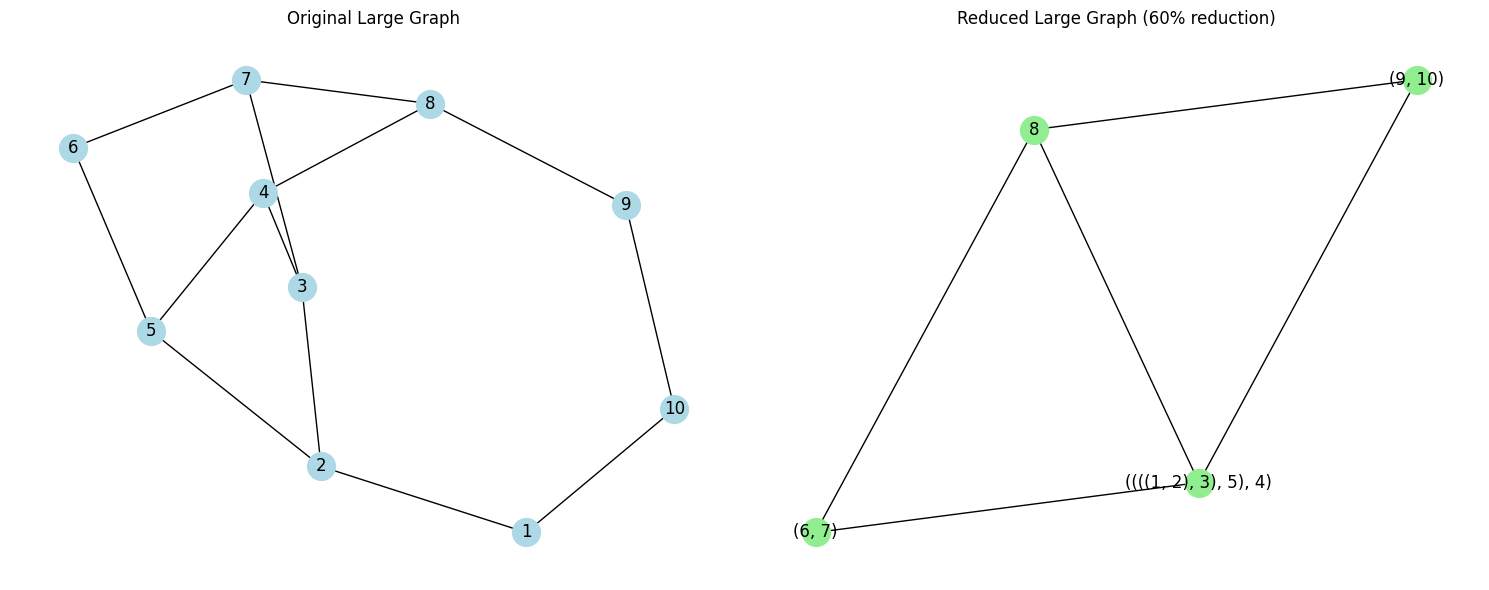

In [6]:
# Create a larger test graph
G_large = nx.Graph()
edges_large = [(i, i+1) for i in range(1, 10)] + [(1, 10)] + [(2, 5), (3, 7), (4, 8)]
G_large.add_edges_from(edges_large)

print("Larger test graph:")
print(f"Nodes: {list(G_large.nodes())}")
print(f"Edges: {list(G_large.edges())}")
print(f"Number of nodes: {G_large.number_of_nodes()}")
print(f"Number of edges: {G_large.number_of_edges()}")

# Test with 60% reduction
print("\nTesting with 60% reduction...")
G_large_reduced = coarsenet(G_large, alpha=0.6, verbose=True)

print("\nResults:")
print(f"Original nodes: {G_large.number_of_nodes()}")
print(f"Reduced nodes: {G_large_reduced.number_of_nodes()}")
print(f"Reduction achieved: {(G_large.number_of_nodes() - G_large_reduced.number_of_nodes()) / G_large.number_of_nodes() * 100:.1f}%")

# Visualize both graphs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

pos1 = nx.spring_layout(G_large)
nx.draw(G_large, pos1, ax=ax1, with_labels=True, node_color='lightblue', 
        node_size=400, font_size=12)
ax1.set_title("Original Large Graph")

pos2 = nx.spring_layout(G_large_reduced)
nx.draw(G_large_reduced, pos2, ax=ax2, with_labels=True, node_color='lightgreen', 
        node_size=400, font_size=12)
ax2.set_title("Reduced Large Graph (60% reduction)")

plt.tight_layout()
plt.show()


## Summary

This notebook demonstrates that the simplified CoarseNet algorithm:

1. **Correctly identifies** unweighted undirected graphs
2. **Uses simple contraction logic** that just preserves connectivity
3. **Avoids unnecessary weight calculations** for unweighted graphs
4. **Maintains structural properties** while reducing graph size
5. **Works with multiple contractions** in sequence

The key improvement is that for unweighted undirected graphs, we now:
- Don't distinguish between (a,b) and (b,a) edges
- Don't recalculate weights for merged nodes
- Simply connect the new merged node to all neighbors of the original nodes
- Focus on preserving the binary connectivity structure
